# Handin 2 -- Gradient Descent


The topic of this handin is Gradient Descent (GD), and the only external library needed
should be numpy. Some tasks ask for some math, this can either be put into the notebook
using markdown, or just shown on a paper when the handin is approved in the lab (show the steps, not just the answer).



## How to deliver
All handins should be approved in lab => That is, there is no uploading/email or anything like that.

## Due date
Should be approved in lab October 1, 2020 the latest.


## What do I need to solve?
All tasks labeled Muggle needs to be solved. The Wizard tasks are optional but solving them
marks the way of a true ML wizard :)






## Task 1a (Muggle)

Solve for $\alpha$ such that $y$ becomes 2.  (Taken from a math exam at BI Nydalen)

1) $\alpha x + y = 4$   
2) $-x + 3y = 2$  

## Task 1b (Muggle)

$A \in \mathcal{R}^{(a \times b)}$  
$B \in \mathcal{R}^{(c \times b)}$  
$C \in \mathcal{R}^{(a \times 1)}$  
$D \in \mathcal{R}^{(1 \times a)}$  
$E \in \mathcal{R}^{(b \times b)}$

Determine if the following equations legal wrt. dim, and if they are legal, what dimention is the output?  
(Note: $M^T$ means $M$ transposed).  

1) $A B$  
2) $A B^T$  
3) $C D$  
4) $C^T D^T$  
5) $(A (E B)) D$   
6) $((B E) A^T) C$   

## Task 1c (Muggle)

What is the derivative of the sigmoid function $\sigma(z) = \frac{1}{1 + e^{-z}}$?  


## Gradient Descent
Below is a simple vectorized impl. of GD that can be used as a starting point.  
Please make sure you understand exactly HOW it works (so that you could have implemented one yourself).

The L1 error is: 3.86
R^2: -0.82


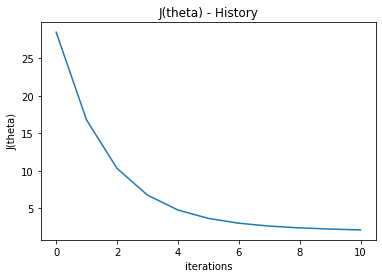

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def predict(theta, xs): 
    return np.dot(xs, theta)


def J_squared_residual(theta, xs, y):  
    h = predict(theta, xs)
   #heiiiiiderererfdsfere sdfadsds
    sr = ((h - y)**2).sum()    
    return sr

def gradient_J_squared_residual(theta, xs, y):
    h = predict(theta, xs) 
    grad = np.dot(xs.transpose(), (h - y)) 
    return grad


# the dataset (already augmented so that we get a intercept coef)
data_x = np.array([[1.0, 0.5], [1.0, 1.0], [1.0, 2.0]])
data_y = np.array([1.0, 1.5, 2.5])
n_features = data_x.shape[1]

# variables we need 
theta = np.zeros((n_features, 1))
learning_rate = 0.1
m = data_x.shape[0]

# run GD
j_history = []
n_iters = 10
for it in range(n_iters):    
    j = J_squared_residual(theta, data_x, data_y)
    j_history.append(j)
    
    theta = theta - (learning_rate * (1/m) * gradient_J_squared_residual(theta, data_x, data_y))
    

# append the final result.
j = J_squared_residual(theta, data_x, data_y)
j_history.append(j)


# find the L1 error.
y_pred = predict(theta, data_x)
l1_error = np.abs(y_pred - data_y).sum()
print("The L1 error is: {:.2f}".format(l1_error))

# Find the R^2 
# if the data is normalized: use the normalized data not the original data (task 3 hint).
# https://en.wikipedia.org/wiki/Coefficient_of_determination
u = ((data_y - y_pred)**2).sum()
v = ((data_y - data_y.mean())** 2).sum()
print("R^2: {:.2f}".format(1 - (u/v)))


# plot the result
plt.plot(j_history)
plt.title("J(theta) - History")
plt.ylabel('J(theta)')
plt.xlabel('iterations')
plt.show()


## Task 2a (Wizard) -- Quadratic regression

In the lecture we showed how the GD step for a linear regression.
Show how the GD update equations would be if we instead using the following function:

$f_{\theta_0, \theta_1}(x) = \theta_0 x^2 + \theta_1 x$


## Task 2b (Wizard) -- Quadratic regression
Implement the exponential loss function and show that it converges.


In [2]:
# Impl the Quadratic regression (use the GD example above as a template).


## Task 3 -- House Price Prediction (Muggle)

The task is to create a linear predictor that takes a set of features 
and predicts how much the house was sold for.  

The metric to report (on the test set) should be the mean of the absolute error (L1 error)
and the Coefficient of determination (R^2) (on the normalized data).
(see: https://en.wikipedia.org/wiki/Coefficient_of_determination)

**Grading:**
* The R^2 score to pass (as a muggle) is R^2 > 0.90.
* For a ML Wizard it is possible to get a R^2 score $\approx$ 1.0


### Dataset
The dataset concist of three files: train.json, test.json and schools.txt.  
Each line in 'schools.json' consist of the x,y variable of a school in the city.


### Features
* house_size - size of the house
* build_year - year the house was built in
* month - the month the house was sold (1 is jan, 12 is des) (category variable)
* garden_size - size of garden, from 0 to 10.
* x - the x coordinate of the house (centered around the city centre/downtown).
* y - the y coordinate of the house (centered around the city centre/downtown).
* color - the color of the house: 1 - black, 2 - white, 3 - red (category variable)
* price -  **the  target variable for Task 3**

Each line in the files is a json object and can be loaded using the code example given below.

The sales person says that the euclidian distance to the closest school and the euclidian distance to downtown is known to be important :)

### Flow
To assist a bit, here is a suggested flow of the task (feel free to create more cells to help readability of the code):

1. Load the data.
2. Inspect the data using plots and looking the data.
3. Generate features (such as one-hot encoding and feature engineering).
4. Normalize the data.
5. Train the model using GD.
6. Test on the test set.



In [3]:
# loading the test dataset (extend to load both the training data and the schools)
import os
import json


def load_line_json(path):
    dataset = []
    with open(path, "r") as fp:
        for line in fp:
            example = json.loads(line)
            dataset.append(example)
    
    print("loaded dataset, with {} examples from: {}.".format(len(dataset), path))
    return dataset
        
# the dataset for handin2 is found on canvas.
path_to_dataset = "/home/sondre/Dropbox/edu/ml_intro_2020/lecture2/data"
path_to_test = os.path.join(path_to_dataset, "test.json")

assert os.path.isfile(path_to_test)


test_dataset = load_line_json(path_to_test)
print("showing the first example:")
print(test_dataset[0])



AssertionError: 

In [ ]:
# Investigate the data

In [ ]:
# Generate features (such as one-hot encoding and feature engineering).

In [ ]:
# Normalize the data.

In [ ]:
# Train the model using GD 

In [ ]:
# Find the L1 error on the test set and the R^2 score.

## Task 4a (Muggle) -- Find the beta coefficients.


Since the variables are normalized we can find the beta coefficient (also called the standarized coefficients) for feature $i$ using the formula:  
$\beta_i = \frac{|\theta_i|}{\sum_j |\theta_j|}$

1) Find the beta coefficients.  
2) Since some of the features are one-hot encoded we need to sum over the dimensions belonging to a variable.  
3) Print the features with names and their $\beta$ coef in a sorted order, from biggest to smallest.



In [ ]:
# find the beta coef's


## Task 4b (Muggle) -- Explainability

What can we say about the model by looking that the beta coefficients of the model?
For instance:  

* What month is the best to sell the house in?
* Is the color of the house relevant?
* How does the age of the house impact the price? 
* If a new school got located right by my house, would my house go up in value or down?

In [ ]:
# 

## Task 4c (Wizard) -- Explainability 2

The standard coefficients/beta coefficients does not take into account the scale of the features.  
As such it might be hard to determine exactly how much they impact the prediction.  

Suggest a way to determine how important the different features are to the model and
test it.




## Task 5 (Wizard) -- Logistic Regression

Transform the houseprice dataset into a classification problem by assigning:  
* y=1 for houses that price > 2500
* y=0 else.

Then use logistic regression to classify each house into the expensive
class (price > 2500 => y=1) or not (y=0).

Most of the code from Task 3 should be re-used here.


In [ ]:
# logistic regression